### Problem: Does screen time vary between users of Android and iPhone smartphones?

Ho: There is no significant difference in the average phone screen time for Android and iPhone users.

Ha: There is a significant difference in the average phone screen time between Android and iPhone users.

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
import scipy.stats as stats
from statsmodels.stats.weightstats import ttest_ind
import pingouin as pg


In [2]:
# Load the dataset

students_data = pd.read_csv('Students Phone Time.csv')
pd.set_option('display.max_columns', 30)
students_data

,ID,Gender,Classification,Height,Shoe Size,Phone Time,# of Shoes,Birth order,Pets,Happy,Funny,College,Bfast Calories,Exercise,Stat Pre,Stat Post,Phone Type,Sleep,Social Media,Impact of SocNetworking,Political,Animal,Superhero
0,1,male,senior,67.75,7.0,12.0,12.0,youngest,5.0,0.80,7.0,Natural Sciences,500.0,360,3.0,NaN,iPhone,7.0,180.0,worse,Democrat,Dog person,Batman
1,2,male,freshman,71.00,7.5,1.5,5.0,middle,4.0,0.75,8.0,Natural Sciences,0.0,200,9.0,NaN,Android smartphone,7.0,20.0,better,Democrat,Dog person,Batman
2,3,female,freshman,64.00,6.0,25.0,15.0,oldest,8.0,0.90,6.0,Natural Sciences,200.0,30,7.0,5.0,Android smartphone,8.0,60.0,better,Republican,Dog person,Batman
3,4,female,freshman,63.00,6.5,30.0,30.0,middle,12.0,0.98,9.0,Education,200.0,180,6.0,7.0,iPhone,6.0,60.0,better,Republican,Both,Superman
4,5,male,senior,69.00,6.5,23.0,8.0,oldest,4.0,0.75,6.0,Natural Sciences,0.0,180,4.0,7.0,iPhone,5.5,60.0,worse,Independent,Dog person,Superman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,female,freshman,65.00,6.5,40.0,50.0,youngest,7.0,0.95,8.0,Nursing,2.0,30,4.0,8.0,iPhone,8.0,60.0,no impact,Independent,Dog person,Batman
72,73,female,freshman,62.00,7.0,60.0,8.0,only child,3.0,0.80,8.0,Undergraduate Studies,1000.0,0,3.0,6.0,iPhone,5.0,100.0,no impact,Republican,Both,Captain America
73,74,female,freshman,65.00,6.0,2.5,30.0,youngest,4.0,0.65,NaN,Natural Sciences,275.0,360,6.0,8.0,Android smartphone,5.0,60.0,worse,Independent,Both,Superman
74,75,female,sophomore,65.00,6.5,20.0,15.0,middle,4.0,0.90,8.0,Undergraduate Studies,250.0,120,6.0,NaN,iPhone,6.5,120.0,better,Democrat,Dog person,Superman


In [3]:
students_data['Phone Type'].value_counts()

iPhone                43
Android smartphone    33
Name: Phone Type, dtype: int64

In [4]:
# Selecting the relevant columns

screen_time = students_data[['Phone Type', 'Phone Time']]
screen_time

,Phone Type,Phone Time
0,iPhone,12.0
1,Android smartphone,1.5
2,Android smartphone,25.0
3,iPhone,30.0
4,iPhone,23.0
...,...,...
71,iPhone,40.0
72,iPhone,60.0
73,Android smartphone,2.5
74,iPhone,20.0


### Check for independence and normality assumptions for each group separately

In [5]:
phones = screen_time['Phone Type'].unique()
phones

array(['iPhone', 'Android smartphone'], dtype=object)

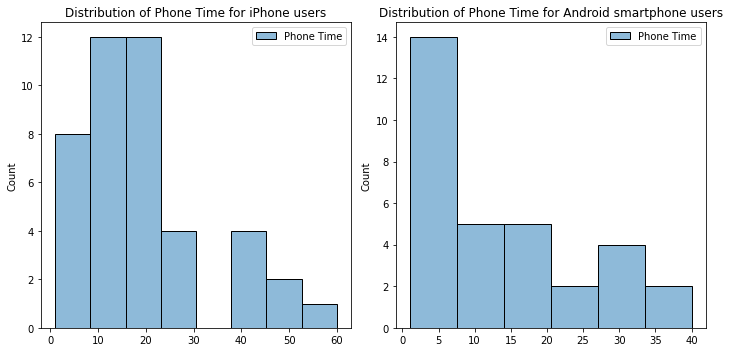

In [6]:
fig = plt.figure(figsize=(10,5))

for i, phone in enumerate(phones):
    ax = fig.add_subplot(1,2,i+1)
    df = screen_time[screen_time['Phone Type'] == phone]
    sns.histplot(data=df)
    ax.set_title('Distribution of Phone Time for ' + phone + ' users')

fig.tight_layout()
plt.show()

<AxesSubplot:xlabel='Phone Type', ylabel='Phone Time'>

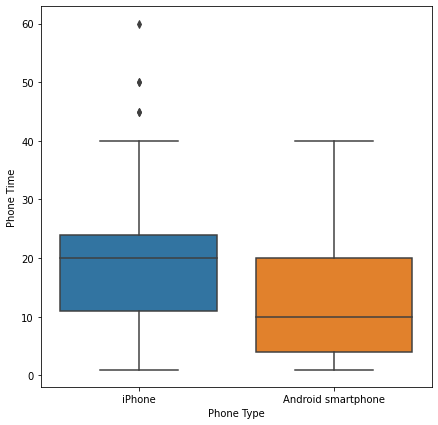

In [7]:
plt.figure(figsize=(7,7))
sns.boxplot(data=screen_time, x='Phone Type', y='Phone Time')

Because the two groups come from a simple random sample of a population, the independence condition is satisfied.

Since there are no extreme outliers for each group, the normality condition is satisfied.

### Compute summary statistics for each group

In [8]:
iPhone = screen_time.loc[screen_time['Phone Type'] == 'iPhone', 'Phone Time'].dropna()
Android = screen_time.loc[screen_time['Phone Type'] == 'Android smartphone', 'Phone Time'].dropna()

In [9]:
print('Summary statistics for iPhone users:\n')
print('Sample size:', len(iPhone))
print('Mean:', iPhone.mean())
print('Standard Deviation:', statistics.stdev(iPhone))

print('\nSummary statistics for Android smartphone users:')
print('\nSample size:', len(Android))
print('Mean:', Android.mean())
print('Standard Deviation:', statistics.stdev(Android))

Summary statistics for iPhone users:

Sample size: 43
Mean: 20.511627906976745
Standard Deviation: 14.133078546147814

Summary statistics for Android smartphone users:

Sample size: 32
Mean: 13.28125
Standard Deviation: 11.415140978033827


### Perform independent t-test using Scipy

In [10]:
stats.ttest_ind(a=iPhone, b=Android)

Ttest_indResult(statistic=2.3734928820070422, pvalue=0.020254077665073523)

### Perform independent t-test using Statsmodels

In [11]:
ttest_ind(x1=iPhone, x2=Android)

(2.3734928820070422, 0.020254077665073523, 73.0)

### Perform independent t-test using Pingouin

In [12]:
pg.ttest(x=iPhone, y=Android, paired=False, alternative='two-sided', correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.373493,73,two-sided,0.020254,"[1.16, 13.3]",0.554127,2.601,0.648857


### Interpret the results in the context of data

Because the p-value of 0.02 is less than 0.05, the data provides strong evidence to reject the null hypothesis. There is a significant difference in the average phone screen time between iPhone and Android users. Since the average screen time of iPhone users is higher than Android users, we can conclude that iPhone users spend more time on screen, on average, than Android users.

We are 95% confident that iPhone users spend more time on screen than Android users by 1.16 to 13.3 hours per week.